In [1]:
from keras.datasets.fashion_mnist import *
import keras

Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

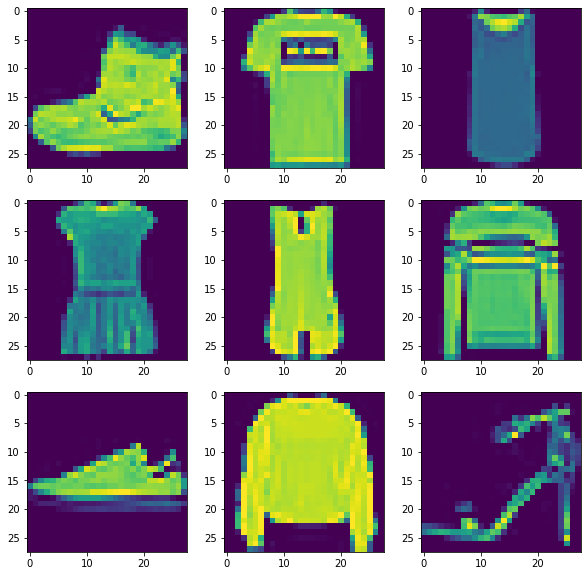

In [4]:
fig, ax = plt.subplots(3,3,figsize=(10,10))
ax=ax.ravel()

for i in range(9):
    ax[i].imshow(x_train[i])

In [5]:
print(f'{x_train.shape},\n\n{y_train.shape}\n')
print(f'{x_test.shape},\n\n{y_test.shape}')

(60000, 28, 28),

(60000,)

(10000, 28, 28),

(10000,)


# Preprocessing

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_train.shape

(60000, 28, 28, 1)

In [7]:
x_test = x_test.reshape(10000,28,28,1)
x_test.shape

(10000, 28, 28, 1)

## normalize
## 0 < {x_train, x_test} < 1 사이 값으로 변환

In [8]:
x_train = x_train/255
x_train[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.75686275],
       [0.89411765],
       [0.85490196],
       [0.83529412],
       [0.77647059],
       [0.70588235],
       [0.83137255],
       [0.82352941],
       [0.82745098],
       [0.83529412],
       [0.8745098 ],
       [0.8627451 ],
       [0.95294118],
       [0.79215686],
       [0.        ]])

In [9]:
x_test = x_test/255
x_test[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.01568627],
       [0.        ],
       [0.20784314],
       [0.50588235],
       [0.47058824],
       [0.57647059],
       [0.68627451],
       [0.61568627],
       [0.65098039],
       [0.52941176],
       [0.60392157],
       [0.65882353],
       [0.54901961],
       [0.        ],
       [0.        ]])

# y-encoding --> to_categorical

In [10]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [11]:
y_test = to_categorical(y_test)
y_test.shape

(10000, 10)

# Build a CNN model

In [12]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [13]:
model = Sequential()
model.add(Conv2D(128, #  노드 갯수 / 1-layer
                 kernel_size=3, # 필터의 사이즈가 3x3 이라는 의미
                 activation='relu',
                 input_shape=(28,28,1),
                 padding='same')) # convolution 과정 지난 후 적용할 함수

In [14]:
model.add(MaxPooling2D(pool_size=(2,2),
                       padding='same'))

In [15]:
model.add(Dropout(.25))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [16]:
model.add(Conv2D(64,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))

In [17]:
model.add(MaxPooling2D(pool_size=(2,2),
                       padding='same'))

In [18]:
model.add(Dropout(.25))

In [19]:
model.add(Conv2D(32,
                 kernel_size=3,
                 activation='relu',
                 padding='same'))

In [20]:
model.add(MaxPooling2D(pool_size=(2,2),
                       padding='same'))

In [21]:
model.add(Dropout(.25))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(128, activation='relu'))

In [24]:
model.add(Dropout(.25))

In [25]:
model.add(Dense(10, activation='softmax'))

In [26]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

import multiprocessing
fast = multiprocessing.Pool(processes=6)

In [39]:
history = model.fit(x_train,
                    y_train,
                    batch_size=64,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test,y_test))

AttributeError: 'Pool' object has no attribute 'model'

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(17,6))
ax = ax.ravel() 

plt.title('accuracy')
ax[0].plot(history.history['acc'], label='train')
ax[0].plot(history.history['val_acc'], label='test')

plt.title('Loss')
ax[1].plot(history.history['loss'], label='train')
ax[1].plot(history.history['val_loss'], label='test')

plt.legend()
plt.show()

model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
y_pred = model.predict(x_test)
y_pred

In [ ]:
model.evaluate(x_test, y_test)

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))